# Stochastic Processes in Financial Modeling

## Brownian Motion

Brownian motion, also known as Wiener process, is a continuous-time stochastic process used to model random movements in financial markets. It is characterized by its property of having independent and normally distributed increments.

## Ornstein-Uhlenbeck Path

The Ornstein-Uhlenbeck process is a stationary Gaussian process that models mean-reverting behavior. It is often used to model interest rates, exchange rates, and other financial variables that exhibit mean reversion.

## Simulation of Price Path using Black-Scholes Model

The Black-Scholes model is a mathematical model used to calculate the theoretical price of European-style options. By simulating price paths using this model, one can generate potential future scenarios for the underlying asset's price.

## Simulated Paths with Black-Scholes Equation Differential Stochastic Applied to S&P 500 Historical Price

Applying the Black-Scholes equation to historical S&P 500 prices allows for the simulation of potential future price paths. This helps in understanding the behavior of the index and making informed investment decisions.

## Comparison between Actual Daily Returns and Returns Simulated from the Paths

By comparing actual daily returns with returns simulated from the Black-Scholes model, one can assess the model's effectiveness in capturing the underlying dynamics of the market. Discrepancies between the two can highlight areas where the model may need improvement.

## Jump Diffusion Model Simulation for S&P 500

The Jump Diffusion model extends the traditional Black-Scholes model by incorporating jumps in asset prices. This provides a more accurate representation of real-world market behavior, where sudden, discontinuous price movements occur due to unforeseen events or news.

## Merton's Jump-Diffusion Model Applied to S&P 500 Historical Price

Merton's Jump-Diffusion model combines the continuous diffusion process of the Black-Scholes model with occasional jumps in asset prices. By applying this model to historical S&P 500 prices, one can simulate price paths that account for both continuous and discontinuous movements.

## Objective Function to Minimize the Squared Error

To find optimal parameters for a stochastic model, an objective function is defined to minimize the squared error between real and simulated returns. This helps in calibrating the model to best fit historical data and improve its predictive accuracy.

## Calculation of Squared Differences between Real and Simulated Returns

The squared differences between real and simulated returns are calculated to quantify the accuracy of the stochastic model. Minimizing these differences through parameter optimization leads to a better-fitting model and more reliable predictions.

## Searching Optimal Parameters for the Model

Parameter optimization involves searching for the optimal values of model parameters that minimize the objective function. This process is often performed using optimization algorithms such as gradient descent or genetic algorithms to find the best-fitting model parameters.



C:\Users\baart\AppData\Local\Temp\ipykernel_24320\2205816016.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


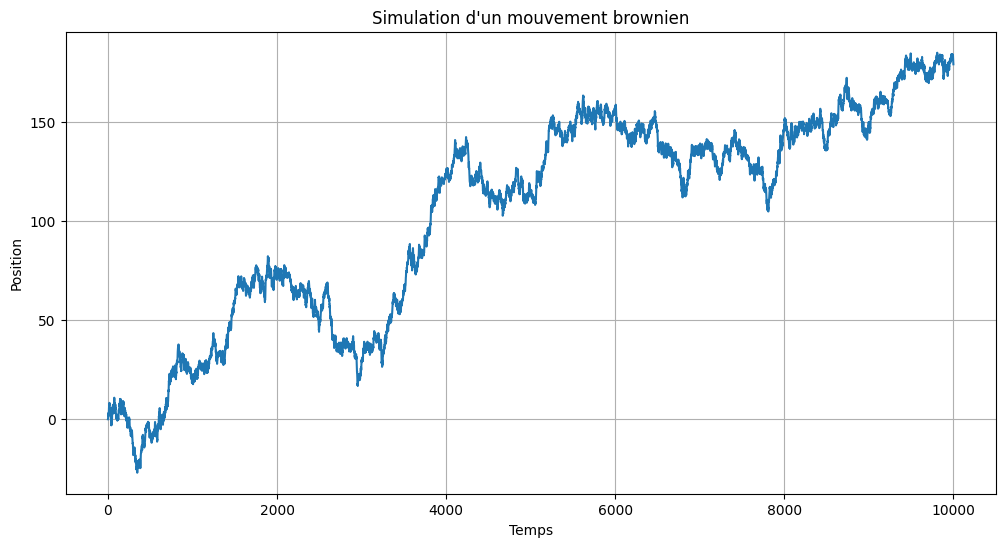

count    10001.000000
mean       103.527436
std         54.048681
min        -27.007380
25%         60.085864
50%        122.288634
75%        146.728863
max        185.106375
Name: Position, dtype: float64


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Fonction pour générer une étape de mouvement brownien
def brownian_motion(X, dt):
    sigma = np.sqrt(dt)  # L'écart-type dépend de l'intervalle de temps
    return X + np.random.normal(0, sigma)

# Initialisation des variables
temps_initial = 0
temps_final = 10000
dt = 1  # Pas de temps
T = np.arange(temps_initial, temps_final + dt, dt)  # Temps de 0 à 99, inclus
X = [0]  # X commence avec une valeur initiale, par exemple 0

# Simulation du mouvement brownien
for t in range(1, len(T)):
    X.append(brownian_motion(X[-1], dt))

# Création d'un DataFrame pour stocker les temps et les positions
df = pd.DataFrame({'Temps': T, 'Position': X})

# Affichage du mouvement brownien en utilisant pandas pour le plot
plt.figure(figsize=(12, 6))
plt.plot(df['Temps'], df['Position'])
plt.title("Simulation d'un mouvement brownien")
plt.xlabel("Temps")
plt.ylabel("Position")
plt.grid(True)
plt.show()
#description du mouvement
print(df['Position'].describe())


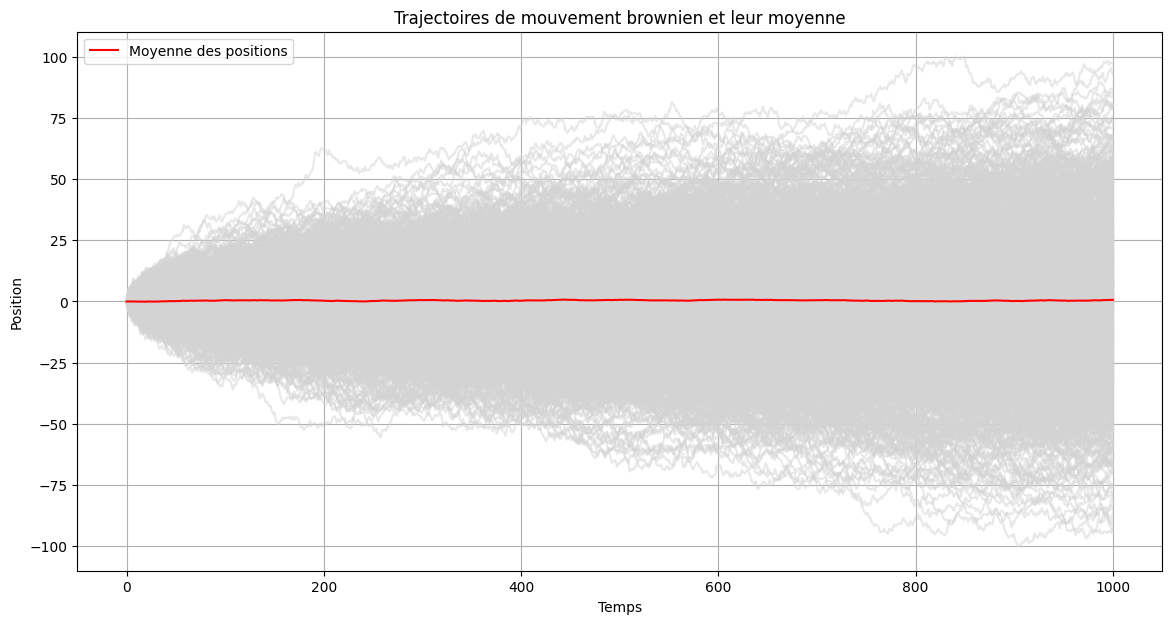

count    1000.000000
mean        0.691354
std        32.368323
min       -93.043179
25%       -21.752602
50%         2.858758
75%        22.125709
max        96.920434
Name: 1000, dtype: float64

Analyse de la moyenne des positions à chaque instant de temps:
count    1001.000000
mean        0.394311
std         0.188824
min        -0.099666
25%         0.268048
50%         0.409568
75%         0.524801
max         0.789072
dtype: float64


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def multiple_brownian_paths(n_paths, temps_final, dt):
    """Génère n_paths trajectoires de mouvement brownien."""
    T = np.arange(0, temps_final + dt, dt)
    paths = np.zeros((len(T), n_paths))
    for path in range(n_paths):
        for t in range(1, len(T)):
            sigma = np.sqrt(dt)
            paths[t, path] = paths[t-1, path] + np.random.normal(0, sigma)
    return T, paths

# Paramètres de simulation
n_paths = 1000  # Nombre de trajectoires à simuler
temps_final = 1000  # Temps final de la simulation
dt = 1  # Pas de temps

T, paths = multiple_brownian_paths(n_paths, temps_final, dt)

# Convertir en DataFrame pour une manipulation plus facile
df = pd.DataFrame(paths, index=T)

# Calculer la moyenne des positions à chaque instant de temps sur toutes les trajectoires
mean_positions = df.mean(axis=1)

# Afficher les trajectoires et la moyenne
plt.figure(figsize=(14, 7))
for path in range(n_paths):
    plt.plot(T, df.iloc[:, path], color='lightgray', alpha=0.5)
plt.plot(T, mean_positions, color='red', label='Moyenne des positions')
plt.title("Trajectoires de mouvement brownien et leur moyenne")
plt.xlabel("Temps")
plt.ylabel("Position")
plt.legend()
plt.grid(True)
plt.show()

# Description statistique de la position finale
print(df.iloc[-1].describe())

# Analyse de la moyenne des positions à chaque instant de temps
print("\nAnalyse de la moyenne des positions à chaque instant de temps:")
print(mean_positions.describe())


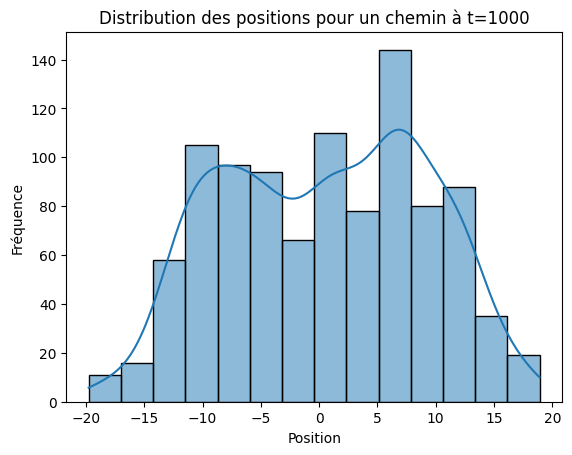

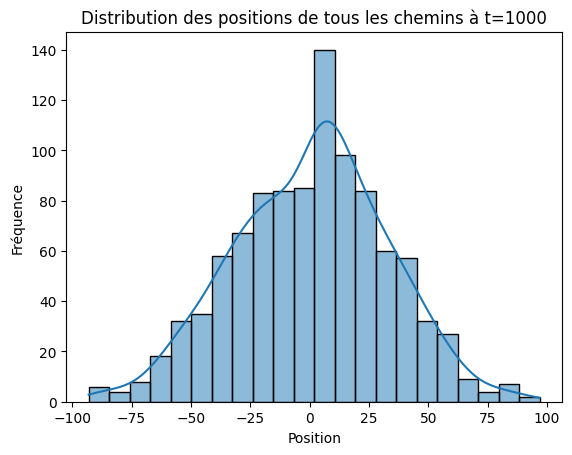

In [3]:
import seaborn as sns

# Choisissez un instant de temps pour l'analyse
temps_analyse = temps_final

# Tracer la distribution des positions pour un chemin individuel à temps_analyse
sns.histplot(df.iloc[:, 0], kde=True)
plt.title(f"Distribution des positions pour un chemin à t={temps_analyse}")
plt.xlabel("Position")
plt.ylabel("Fréquence")
plt.show()

# Tracer la distribution des positions de tous les chemins à temps_analyse
sns.histplot(df.iloc[-1, :], kde=True)
plt.title(f"Distribution des positions de tous les chemins à t={temps_analyse}")
plt.xlabel("Position")
plt.ylabel("Fréquence")
plt.show()


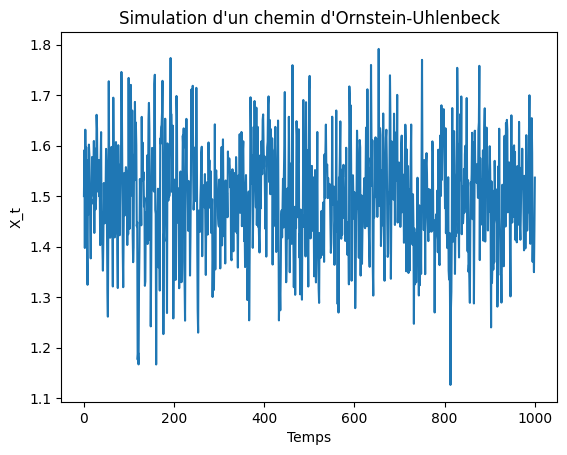

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Paramètres de l'EDS d'Ornstein-Uhlenbeck
theta = 0.7  # taux de retour à la moyenne
mu = 1.5     # moyenne de long terme
sigma = 0.1  # volatilité
dt = 1    # pas de temps
T = 1000        # horizon temporel
n = int(T/dt)  # nombre de points dans le temps

# Processus de simulation
temps = np.linspace(0, T, n)
X = np.zeros(n)
X[0] = mu  # initialisation de la valeur à la moyenne de long terme pour simplifier

for t in range(n-1):
    dW = np.random.normal(0, np.sqrt(dt))  # incrément d'un mouvement brownien
    X[t+1] = X[t] + theta * (mu - X[t]) * dt + sigma * dW  # formule d'Ornstein-Uhlenbeck

# Tracé du chemin simulé
plt.plot(temps, X)
plt.title("Simulation d'un chemin d'Ornstein-Uhlenbeck")
plt.xlabel("Temps")
plt.ylabel("X_t")
plt.show()


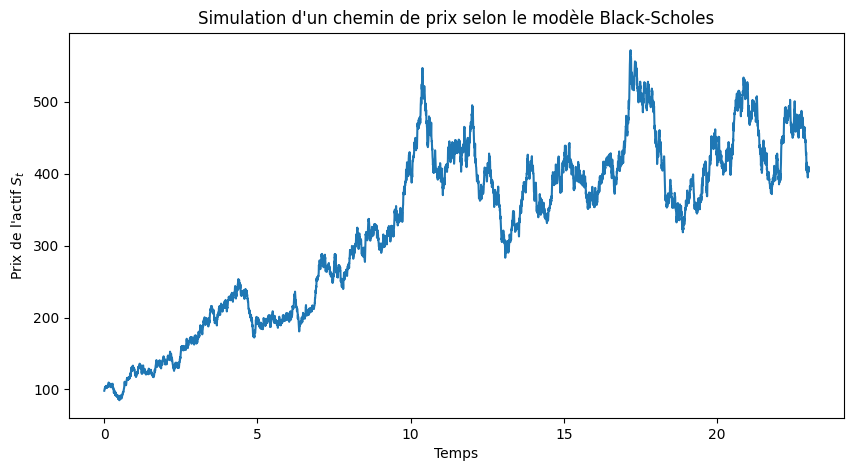

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Paramètres du modèle
S0 = 100  # Prix initial de l'actif
mu = 0.05  # Taux de rendement attendu (drift)
sigma = 0.2  # Volatilité de l'actif (diffusion)
T = 23  # Horizont de temps (1 an dans ce cas)
dt = 1/252  # Pas de temps pour la simulation
N = int(T/dt)  # Nombre de points dans le temps

# Générer un chemin de prix pour l'actif
temps = np.linspace(0, T, N)
B_t = np.random.normal(0, np.sqrt(dt), N).cumsum()  # Mouvement brownien
S_t = S0 * np.exp((mu - 0.5 * sigma**2) * temps + sigma * B_t)  # EDS Black-Scholes

# Affichage du chemin simulé
plt.figure(figsize=(10, 5))
plt.plot(temps, S_t)
plt.title("Simulation d'un chemin de prix selon le modèle Black-Scholes")
plt.xlabel("Temps")
plt.ylabel("Prix de l'actif $S_t$")
plt.show()


[*********************100%%**********************]  1 of 1 completed


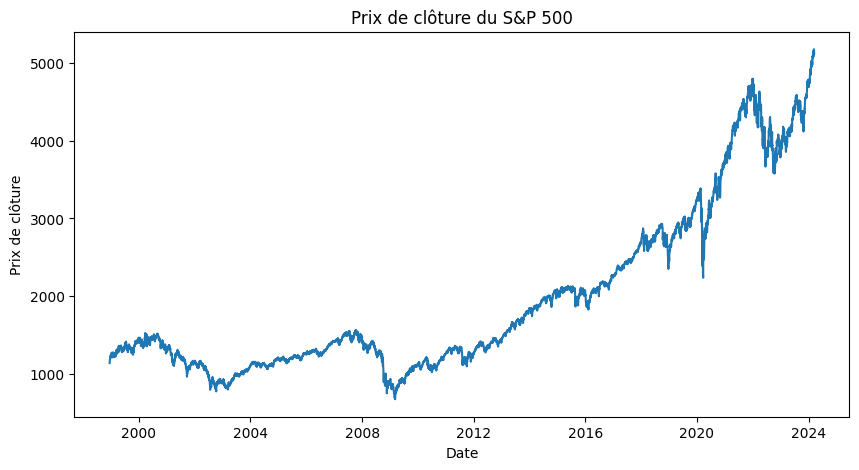

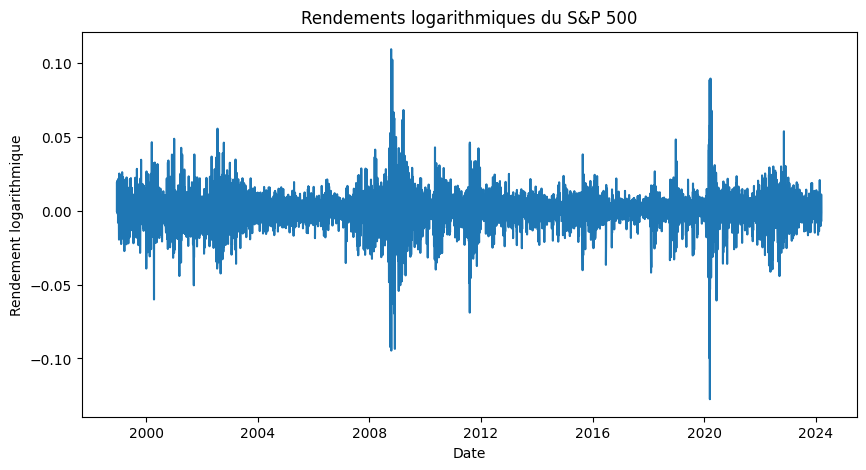

La moyenne des rendements logarithmiques du S&P 500 est : 0.00023618850779057198


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# Téléchargement des données
data = yf.download(tickers='^GSPC', start="1998-12-12", end="2024-03-16")
data = data['Close']

# Calcul des rendements logarithmiques
log_returns = np.log(data / data.shift(1))

# Affichage des prix de clôture du S&P 500
plt.figure(figsize=(10, 5))
plt.plot(data.index, data)
plt.title("Prix de clôture du S&P 500")
plt.xlabel("Date")
plt.ylabel("Prix de clôture")
plt.show()

# Affichage des rendements logarithmiques
plt.figure(figsize=(10, 5))
plt.plot(log_returns.index, log_returns)
plt.title("Rendements logarithmiques du S&P 500")
plt.xlabel("Date")
plt.ylabel("Rendement logarithmique")
plt.show()

# Calcul de la moyenne des rendements logarithmiques
mean_log_return = log_returns.mean()
print("La moyenne des rendements logarithmiques du S&P 500 est :", mean_log_return)


[*********************100%%**********************]  1 of 1 completed
C:\Users\baart\AppData\Local\Temp\ipykernel_24320\3154520192.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  S0 = data[0]  # Premier prix connu pour commencer la simulation


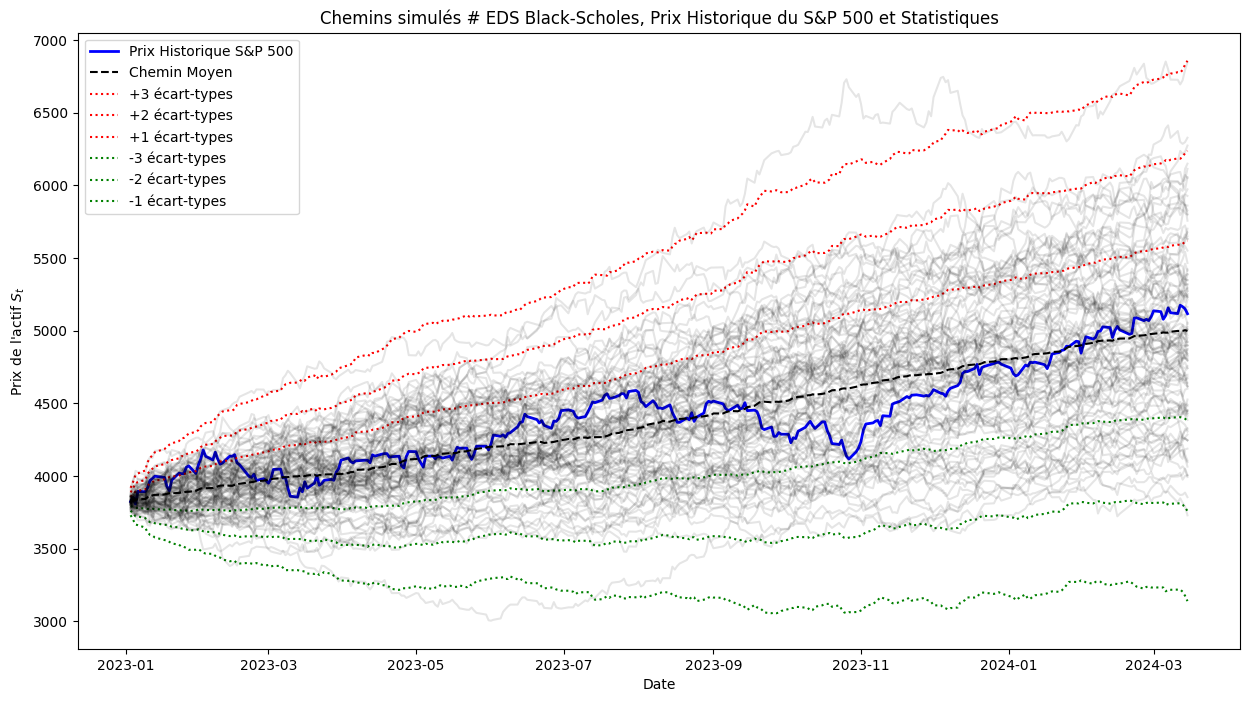

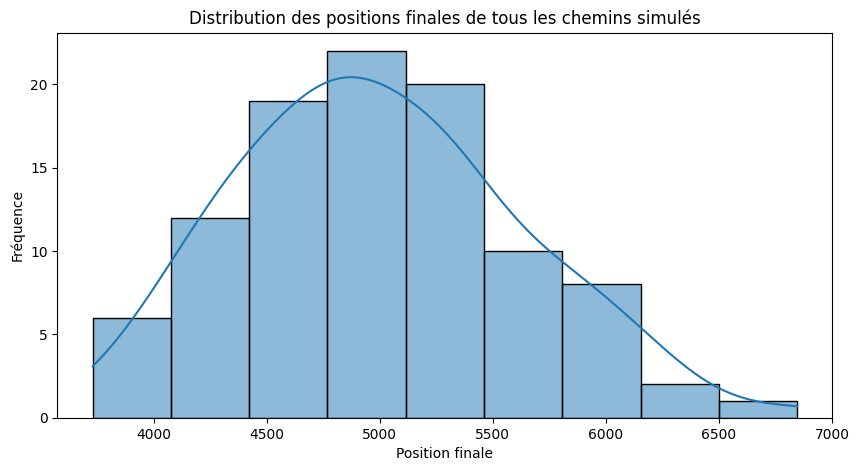

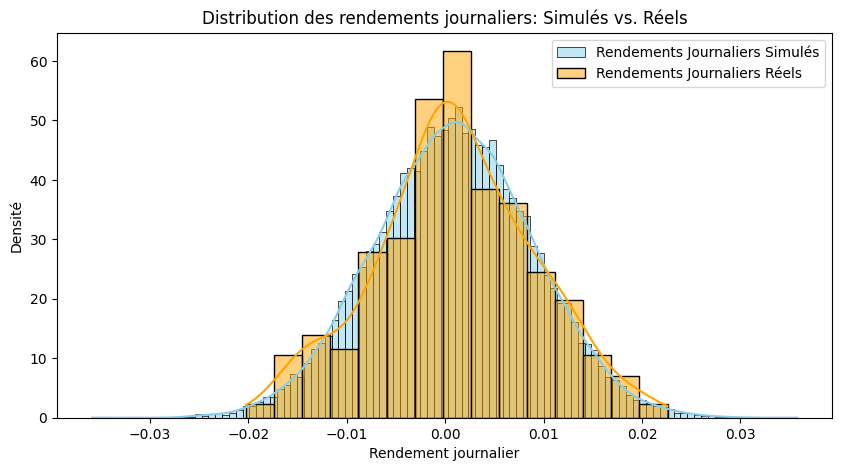

In [7]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Téléchargement des données
data = yf.download(tickers='^GSPC', start="2023-01-01", end="2024-03-16")
data = data['Close']

# Définition des paramètres pour la simulation basée sur la durée des données historiques
S0 = data[0]  # Premier prix connu pour commencer la simulation
N = len(data)  # Nombre total de jours dans les données historiques
T = (data.index[-1] - data.index[0]).days / 365.25  # Durée en années
dt = 1/252  # Pas de temps basé sur le nombre de jours de trading dans une année

# Calcul des rendements logarithmiques pour obtenir mu et sigma
log_returns = np.log(data / data.shift(1))
mu = log_returns.mean() * 252  # Convertir la moyenne quotidienne en annuelle
sigma = log_returns.std() * np.sqrt(252)  # Convertir l'écart-type quotidien en annuel

# Simulation de chemins
simulations = 100
temps = np.linspace(0, T, N)  # Temps ajusté pour correspondre à la longueur des données
S_t_paths = np.zeros((N, simulations))
for i in range(simulations):
    B_t = np.random.normal(0, np.sqrt(dt), N).cumsum()
    S_t_paths[:, i] = S0 * np.exp((mu - 0.5 * sigma**2) * temps + sigma * B_t)

# Calcul de la moyenne et de l'écart type des chemins simulés
chemin_moyen = np.mean(S_t_paths, axis=1)
ecart_type = np.std(S_t_paths, axis=1)

# Calcul des bandes à 3 écart-types
trois_ecart_type_haut = chemin_moyen + 3 * ecart_type
deux_ecart_type_haut = chemin_moyen + 2 * ecart_type
un_ecart_type_haut = chemin_moyen + 1 * ecart_type

trois_ecart_type_bas = chemin_moyen - 3 * ecart_type
deux_ecart_type_bas = chemin_moyen - 2 * ecart_type
un_ecart_type_bas = chemin_moyen - 1 * ecart_type

# Affichage des chemins simulés, du prix historique, du chemin moyen et des bandes à 3 écart-types
plt.figure(figsize=(15, 8))
plt.plot(data.index, data, label='Prix Historique S&P 500', linewidth=2, color='blue')
plt.plot(data.index, chemin_moyen, label='Chemin Moyen', color='black', linestyle='--')
plt.plot(data.index, trois_ecart_type_haut, label='+3 écart-types', color='red', linestyle=':')
plt.plot(data.index, deux_ecart_type_haut, label='+2 écart-types', color='red', linestyle=':')
plt.plot(data.index, un_ecart_type_haut, label='+1 écart-types', color='red', linestyle=':')
plt.plot(data.index, trois_ecart_type_bas, label='-3 écart-types', color='green', linestyle=':')
plt.plot(data.index, deux_ecart_type_bas, label='-2 écart-types', color='green', linestyle=':')
plt.plot(data.index, un_ecart_type_bas, label='-1 écart-types', color='green', linestyle=':')

# Pour améliorer la lisibilité, réduisons la transparence des chemins simulés
for i in range(simulations):
    plt.plot(data.index, S_t_paths[:, i], color='black', alpha=0.1)

plt.title("Chemins simulés # EDS Black-Scholes, Prix Historique du S&P 500 et Statistiques")
plt.xlabel("Date")
plt.ylabel("Prix de l'actif $S_t$")
plt.legend()
plt.show()

import seaborn as sns

# Choisissez un instant de temps pour l'analyse - ici, la fin de la période de simulation
positions_finales = S_t_paths[-1, :]

# Tracer la distribution des positions finales de tous les chemins
plt.figure(figsize=(10, 5))
sns.histplot(positions_finales, kde=True)
plt.title("Distribution des positions finales de tous les chemins simulés")
plt.xlabel("Position finale")
plt.ylabel("Fréquence")
plt.show()

import seaborn as sns

# Calcul des rendements journaliers pour les chemins simulés
rendements_journaliers_simules = np.log(S_t_paths[1:] / S_t_paths[:-1])

# Calcul des rendements journaliers pour le vrai actif
rendements_journaliers_reels = np.log(data / data.shift(1))

import seaborn as sns

# Rassembler tous les rendements journaliers simulés en un seul tableau
rendements_journaliers_simules_flat = rendements_journaliers_simules.flatten()

# Calculer les rendements journaliers réels (en excluant le premier NaN résultant du shift)
rendements_journaliers_reels = rendements_journaliers_reels.dropna()

# Afficher les distributions de rendements journaliers
plt.figure(figsize=(10, 5))
sns.histplot(rendements_journaliers_simules_flat, color="skyblue", kde=True, label="Rendements Journaliers Simulés", stat="density")
sns.histplot(rendements_journaliers_reels, color="orange", kde=True, label="Rendements Journaliers Réels", stat="density")
plt.title("Distribution des rendements journaliers: Simulés vs. Réels")
plt.xlabel("Rendement journalier")
plt.ylabel("Densité")
plt.legend()
plt.show()




[*********************100%%**********************]  1 of 1 completed


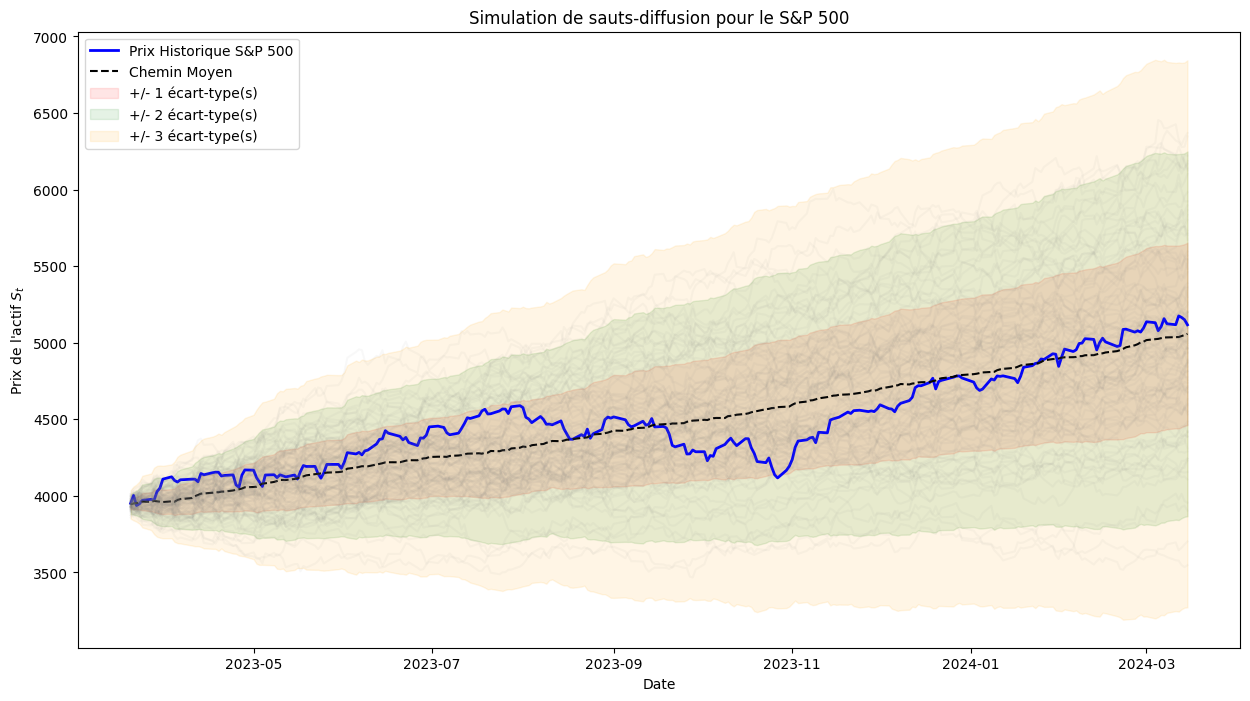

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

# Téléchargement des données
data = yf.download(tickers='^GSPC', start="2023-03-18", end="2024-03-18")
data = data['Close']

# Paramètres initiaux
S0 = data.iloc[0]
N = len(data)
T = (data.index[-1] - data.index[0]).days / 365.25
dt = 1/252

# Paramètres pour la diffusion
log_returns = np.log(data / data.shift(1))
mu = log_returns.mean() * 252
sigma = log_returns.std() * np.sqrt(252)

# Paramètres pour les sauts
lambda_ = 6  # Taux de saut par an
mu_jump = 0  # Moyenne des sauts
sigma_jump = 0.001  # Volatilité des sauts

# Simulation
simulations = 100
temps = np.linspace(0, T, N)
S_t_paths = np.zeros((N, simulations))

for i in range(simulations):
    B_t = np.random.normal(0, np.sqrt(dt), N).cumsum()  # Mouvement brownien
    J_t = np.zeros(N)  # Composante de saut
    for t in range(1, N):
        N_t = np.random.poisson(lambda_ * dt)
        for _ in range(N_t):
            J_t[t] += np.random.normal(mu_jump, sigma_jump)
    S_t_paths[:, i] = S0 * np.exp((mu - 0.5 * sigma**2) * temps + sigma * B_t + J_t)

# Calcul du chemin moyen et des écarts-types
chemin_moyen = np.mean(S_t_paths, axis=1)
ecart_type = np.std(S_t_paths, axis=1)

# Bandes à 1, 2 et 3 écarts-types
plus_moins_ecart_types = [(chemin_moyen + i * ecart_type, chemin_moyen - i * ecart_type) for i in range(1, 4)]

# Affichage des résultats
plt.figure(figsize=(15, 8))
plt.plot(data.index, data, label='Prix Historique S&P 500', linewidth=2, color='blue')
plt.plot(data.index, chemin_moyen, label='Chemin Moyen', color='black', linestyle='--')

couleurs = ['red', 'green', 'orange']
for i, (haut, bas) in enumerate(plus_moins_ecart_types):
    plt.fill_between(data.index, haut, bas, color=couleurs[i], alpha=0.1, label=f'+/- {i+1} écart-type(s)')

# Réduire la transparence des chemins simulés pour améliorer la lisibilité
for i in range(simulations):
    plt.plot(data.index, S_t_paths[:, i], color='grey', alpha=0.05)

plt.title("Simulation de sauts-diffusion pour le S&P 500")
plt.xlabel("Date")
plt.ylabel("Prix de l'actif $S_t$")
plt.legend()
plt.show()


[*********************100%%**********************]  1 of 1 completed


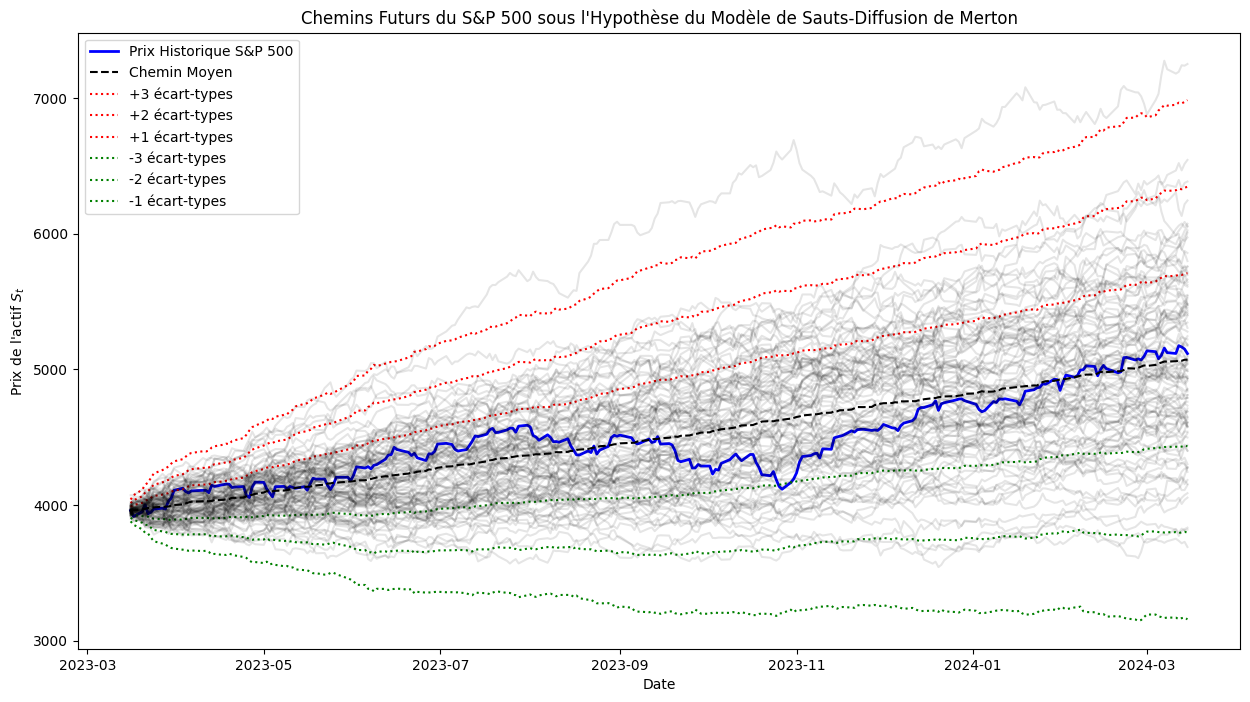

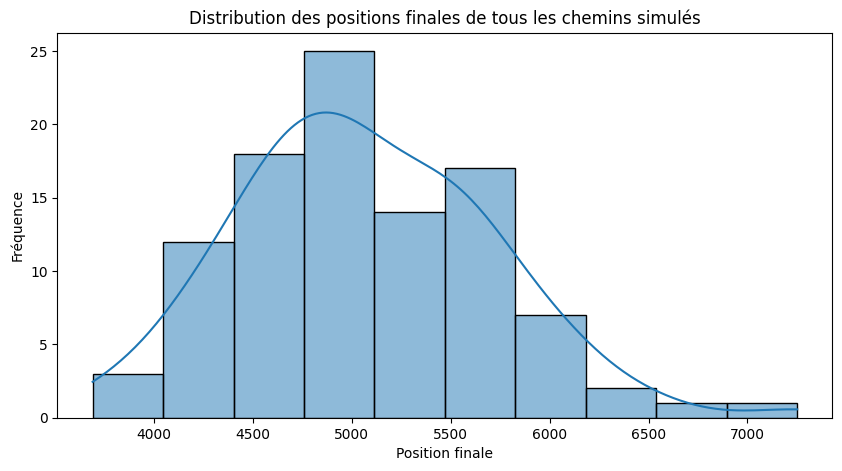

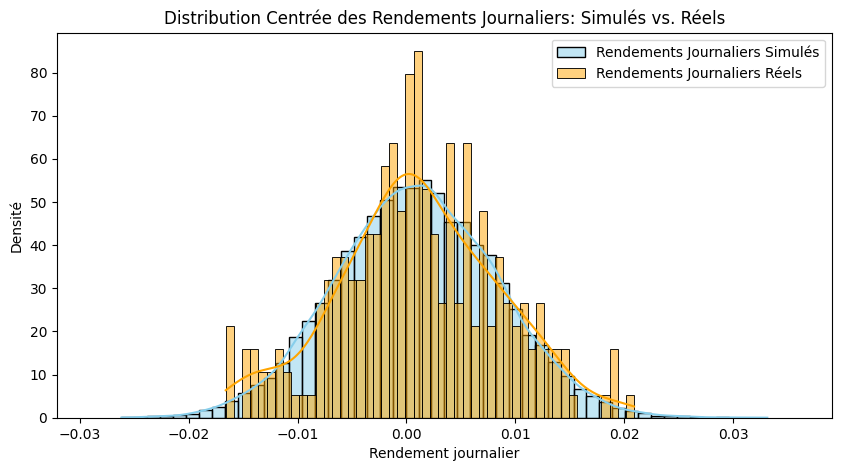

Résumé des Statistiques des Rendements Journaliers Simulés:
                  0
count  25100.000000
mean       0.000954
std        0.007398
min       -0.026172
25%       -0.004065
50%        0.000922
75%        0.005973
max        0.033136

Résumé des Statistiques des Rendements Journaliers Réels:
count    251.000000
mean       0.001021
std        0.007433
min       -0.016600
25%       -0.003708
50%        0.000819
75%        0.005853
max        0.020903
Name: Close, dtype: float64


In [9]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Téléchargement des données
data = yf.download(tickers='^GSPC', start="2023-03-16", end="2024-03-16")
data = data['Close']

''' 
Optimal mu (taux de rendement): 0.2000000468773181
Optimal sigma (volatilité): 0.1281421060598027
Optimal lambda (intensité des sauts): 2.000002244736014
Optimal mu_jump (moyenne des sauts): 9.053210603750467e-08
Optimal sigma_jump (volatilité des sauts): 0.0010005076151002122
'''

# Définition des paramètres pour la simulation basée sur la durée des données historiques
S0 = data.iloc[0]  # Premier prix connu pour commencer la simulation
N = len(data)  # Nombre total de jours dans les données historiques
T = (data.index[-1] - data.index[0]).days / 365.25  # Durée en années
dt = 1/252  # Pas de temps basé sur le nombre de jours de trading dans une année
years = T  # Définition correcte du nombre d'années

# Calcul des rendements logarithmiques pour obtenir mu et sigma
log_returns = np.log(data / data.shift(1))
mu = log_returns.mean() * 252  # Convertir la moyenne quotidienne en annuelle
#mu = 0.2000000468773181
sigma = log_returns.std() * np.sqrt(252)  # Convertir l'écart-type quotidien en annuel
#sigma = 0.1281421060598027
# Nettoyer les données pour enlever les valeurs NaN
cleaned_data = data.dropna()

# Recalculer les rendements quotidiens avec les données nettoyées
daily_returns = np.log(cleaned_data / cleaned_data.shift(1)).dropna()

# Ajuster le seuil de détection des sauts
threshold = np.percentile(abs(daily_returns), 95)  # Utilisation du 90e percentile comme exemple

jumps = daily_returns[abs(daily_returns) > threshold]

''' 
Optimal mu (taux de rendement): 0.20000037361332035
Optimal sigma (volatilité): 0.12814196623573396
Optimal lambda (intensité des sauts): 2.0000000214697455
Optimal mu_jump (moyenne des sauts): 4.1517934111402576e-07
Optimal sigma_jump (volatilité des sauts): 0.001001030102622355
'''
# S'assurer qu'il y a des sauts identifiés avant de procéder
if len(jumps) > 0:
    # Recalculer les paramètres en utilisant les sauts identifiés
    lambda_ = 2.000002244736014
    mu_jump = 9.053210603750467e-08
    sigma_jump = 0.0010005076151002122
else:
    lambda_ = 5
    mu_jump = 0
    sigma_jump = 0.043

# Simulation de chemins avec sauts
simulations = 100
temps = np.linspace(0, T, N)  # Assurez-vous que cela correspond à l'index de vos données historiques
S_t_paths = np.zeros((N, simulations))
# Génération des chemins avec une boucle for correctement
for i in range(simulations):
    B_t = np.random.normal(0, np.sqrt(dt), N).cumsum()  # Mouvement brownien
    J_t = np.zeros(N)  # Initialisation de la composante de sauts
    for t in range(1, N):
        N_t = np.random.poisson(lambda_ * dt)  # Nombre de sauts
        if N_t > 0:
            J_t[t] += np.sum(np.random.normal(mu_jump, sigma_jump, N_t))  # Accumulation des sauts
    # Prix de l'actif simulé à chaque pas de temps
    S_t_paths[:, i] = S0 * np.exp((mu - 0.5 * sigma**2) * temps + sigma * B_t + J_t)

# Calcul de la moyenne et de l'écart type des chemins simulés
chemin_moyen = np.mean(S_t_paths, axis=1)
ecart_type = np.std(S_t_paths, axis=1)

# Calcul des bandes à 3 écart-types
trois_ecart_type_haut = chemin_moyen + 3 * ecart_type
deux_ecart_type_haut = chemin_moyen + 2 * ecart_type
un_ecart_type_haut = chemin_moyen + 1 * ecart_type

trois_ecart_type_bas = chemin_moyen - 3 * ecart_type
deux_ecart_type_bas = chemin_moyen - 2 * ecart_type
un_ecart_type_bas = chemin_moyen - 1 * ecart_type

# Affichage des chemins simulés, du prix historique, du chemin moyen et des bandes à 3 écart-types
plt.figure(figsize=(15, 8))
plt.plot(data.index, data, label='Prix Historique S&P 500', linewidth=2, color='blue')
plt.plot(data.index, chemin_moyen, label='Chemin Moyen', color='black', linestyle='--')
plt.plot(data.index, trois_ecart_type_haut, label='+3 écart-types', color='red', linestyle=':')
plt.plot(data.index, deux_ecart_type_haut, label='+2 écart-types', color='red', linestyle=':')
plt.plot(data.index, un_ecart_type_haut, label='+1 écart-types', color='red', linestyle=':')
plt.plot(data.index, trois_ecart_type_bas, label='-3 écart-types', color='green', linestyle=':')
plt.plot(data.index, deux_ecart_type_bas, label='-2 écart-types', color='green', linestyle=':')
plt.plot(data.index, un_ecart_type_bas, label='-1 écart-types', color='green', linestyle=':')

# Pour améliorer la lisibilité, réduisons la transparence des chemins simulés
for i in range(simulations):
    plt.plot(data.index, S_t_paths[:, i], color='black', alpha=0.1)

plt.title("Chemins Futurs du S&P 500 sous l'Hypothèse du Modèle de Sauts-Diffusion de Merton")
plt.xlabel("Date")
plt.ylabel("Prix de l'actif $S_t$")
plt.legend()
plt.show()

import seaborn as sns

# Choisissez un instant de temps pour l'analyse - ici, la fin de la période de simulation
positions_finales = S_t_paths[-1, :]

# Tracer la distribution des positions finales de tous les chemins
plt.figure(figsize=(10, 5))
sns.histplot(positions_finales, kde=True)
plt.title("Distribution des positions finales de tous les chemins simulés")
plt.xlabel("Position finale")
plt.ylabel("Fréquence")
plt.show()

import seaborn as sns

# Calcul des rendements journaliers pour les chemins simulés
rendements_journaliers_simules = np.log(S_t_paths[1:] / S_t_paths[:-1])

# Calcul des rendements journaliers pour le vrai actif
rendements_journaliers_reels = np.log(data / data.shift(1))

import seaborn as sns

# Rassembler tous les rendements journaliers simulés en un seul tableau
rendements_journaliers_simules_flat = rendements_journaliers_simules.flatten()

# Calculer les rendements journaliers réels (en excluant le premier NaN résultant du shift)
rendements_journaliers_reels = rendements_journaliers_reels.dropna()



# ... code précédent ...

# Ajuster les limites des axes pour mieux voir les distributions
plt.figure(figsize=(10, 5))

# Calculez les limites en utilisant les min et max des deux ensembles de données
x_min = min(rendements_journaliers_simules_flat.min(), rendements_journaliers_reels.min())
x_max = max(rendements_journaliers_simules_flat.max(), rendements_journaliers_reels.max())

# Utilisez un écart pour ne pas coller les distributions aux bords du graphique
x_buffer = (x_max - x_min) * 0.1
x_lim = (x_min - x_buffer, x_max + x_buffer)

sns.histplot(rendements_journaliers_simules_flat, bins=50, color="skyblue", kde=True, label="Rendements Journaliers Simulés", stat="density")
sns.histplot(rendements_journaliers_reels, bins=50, color="orange", kde=True, label="Rendements Journaliers Réels", stat="density")
plt.xlim(x_lim)
plt.title("Distribution Centrée des Rendements Journaliers: Simulés vs. Réels")
plt.xlabel("Rendement journalier")
plt.ylabel("Densité")
plt.legend()
plt.show()


# Résumé statistique
summary_simulated = pd.DataFrame(rendements_journaliers_simules_flat).describe()
summary_real = rendements_journaliers_reels.describe()

print("Résumé des Statistiques des Rendements Journaliers Simulés:")
print(summary_simulated)
print("\nRésumé des Statistiques des Rendements Journaliers Réels:")
print(summary_real)



In [10]:
# Vérifiez si des sauts ont été identifiés
print(f"Nombre de sauts identifiés: {len(jumps)}")
if len(jumps) > 0:
    lambda_ = len(jumps) / years
    mu_jump = jumps.mean()
    sigma_jump = jumps.std()
else:
    lambda_ = 0  # Aucun saut détecté
    mu_jump = 0
    sigma_jump = 0

# Afficher les paramètres des sauts
print(f"Lambda (intensité des sauts par an): {lambda_:.4f}")
print(f"Mu_jump (moyenne des sauts): {mu_jump:.4f}")
print(f"Sigma_jump (volatilité des sauts): {sigma_jump:.4f}")

Nombre de sauts identifiés: 13
Lambda (intensité des sauts par an): 13.0089
Mu_jump (moyenne des sauts): 0.0002
Sigma_jump (volatilité des sauts): 0.0178


In [11]:
from scipy.optimize import minimize

# Définition de la fonction de simulation de chemins avec les paramètres Black-Scholes et Merton
def simulate_paths(params, S0, T, N, dt):
    mu, sigma, lambda_, mu_jump, sigma_jump = params
    temps = np.linspace(0, T, N)
    S_t_paths = np.zeros(N)
    B_t = np.random.normal(0, np.sqrt(dt), N).cumsum()
    J_t = np.zeros(N)
    for t in range(1, N):
        N_t = np.random.poisson(lambda_ * dt)
        J_t[t] = np.sum(np.random.normal(mu_jump, sigma_jump, N_t))
    S_t_paths = S0 * np.exp((mu - 0.5 * sigma**2) * temps + sigma * B_t + J_t)
    return S_t_paths

# Fonction objective pour minimiser l'erreur quadratique
def objective(params, S0, cleaned_data, T, N, dt):
    # Simulez les chemins en utilisant les paramètres courants
    simulated_paths = simulate_paths(params, S0, T, N, dt)
    simulated_log_returns = np.log(simulated_paths[1:] / simulated_paths[:-1])
    
    # Calculez la somme des carrés des différences entre les rendements simulés et réels
    real_log_returns = np.log(cleaned_data / cleaned_data.shift(1)).dropna().values
    sq_diff = np.sum((simulated_log_returns - real_log_returns) ** 2)
    
    return sq_diff

# Paramètres initiaux pour l'optimisation
initial_params = [mu, sigma, lambda_, mu_jump, sigma_jump]

# Bornes pour les paramètres
bounds = [(0, 0.5), (0, 0.5), (0, 5), (-0.3, 0.3), (0, 0.5)]

# Utilisez la méthode 'L-BFGS-B' car elle permet de définir des bornes
result = minimize(objective, initial_params, args=(S0, cleaned_data, T, N, dt), bounds=bounds, method='L-BFGS-B')

# Les meilleurs paramètres trouvés
optimal_mu, optimal_sigma, optimal_lambda, optimal_mu_jump, optimal_sigma_jump = result.x

print(f"Optimal mu (taux de rendement): {optimal_mu}")
print(f"Optimal sigma (volatilité): {optimal_sigma}")
print(f"Optimal lambda (intensité des sauts): {optimal_lambda}")
print(f"Optimal mu_jump (moyenne des sauts): {optimal_mu_jump}")
print(f"Optimal sigma_jump (volatilité des sauts): {optimal_sigma_jump}")


Optimal mu (taux de rendement): 0.25729167268922015
Optimal sigma (volatilité): 0.11798828825816045
Optimal lambda (intensité des sauts): 4.999999872859647
Optimal mu_jump (moyenne des sauts): 0.0001747788263364009
Optimal sigma_jump (volatilité des sauts): 0.017812911103419454
